<a href="https://colab.research.google.com/github/Darshan235/NLP/blob/main/NLP_assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Lab: Analyzing arXiv Paper Abstracts

Domain: Computer Science / AI

## Objectives
- Analyze technical text using spaCy
- Observe limitations of general-purpose NLP models

In [ ]:
# Install required libraries (run if not installed)
!pip install spacy matplotlib pandas --quiet
!python -m spacy download en_core_web_sm

In [1]:
import spacy
import pandas as pd
from collections import Counter
from spacy.matcher import Matcher
import matplotlib.pyplot as plt

## Load Dataset
Expected CSV column: `abstract`

In [5]:
# Load arXiv abstracts
df = pd.read_csv('arxiv_data.csv', engine='python')
texts = df['titles'].dropna().tolist()

print('Total abstracts:', len(texts))
print(texts[0][:300])

Total abstracts: 51774
Survey on Semantic Stereo Matching / Semantic Depth Estimation


## Load spaCy Pipeline

In [6]:
nlp = spacy.load('en_core_web_sm')

## Process Text

In [10]:
docs = list(nlp.pipe(texts))

## Extract Frequent Noun Phrases

In [11]:
noun_phrases = []

for doc in docs:
    for chunk in doc.noun_chunks:
        noun_phrases.append(chunk.text.lower())

np_freq = Counter(noun_phrases)
np_freq.most_common(10)

[('-', 1042),
 ('reinforcement learning', 889),
 ('deep learning', 648),
 ('deep reinforcement learning', 566),
 ('graph neural networks', 519),
 ('generative adversarial networks', 511),
 ('object detection', 489),
 ('end', 420),
 ('image', 409),
 ('transfer learning', 372)]

## Extract Named Entities

In [12]:
entities = []

for doc in docs:
    for ent in doc.ents:
        entities.append(ent.label_)

ent_freq = Counter(entities)
ent_freq

Counter({'ORG': 35003,
         'PERSON': 5746,
         'LOC': 189,
         'WORK_OF_ART': 830,
         'CARDINAL': 948,
         'GPE': 930,
         'FAC': 332,
         'NORP': 422,
         'PRODUCT': 624,
         'LAW': 71,
         'MONEY': 67,
         'ORDINAL': 80,
         'QUANTITY': 13,
         'EVENT': 95,
         'DATE': 110,
         'PERCENT': 5,
         'LANGUAGE': 3,
         'TIME': 9})

## Rule-Based Matcher for Technical Terms

In [13]:
matcher = Matcher(nlp.vocab)

pattern_ml = [
    {'LOWER': {'IN': ['machine', 'deep', 'neural']}},
    {'LOWER': {'IN': ['learning', 'network', 'networks']}}
]

matcher.add('TECH_TERMS', [pattern_ml])

matches = []

for doc in docs:
    for match_id, start, end in matcher(doc):
        matches.append(doc[start:end].text)

Counter(matches).most_common(10)

[('Neural Networks', 2421),
 ('Deep Learning', 1161),
 ('Neural Network', 1092),
 ('Machine Learning', 485),
 ('neural networks', 259),
 ('deep learning', 220),
 ('neural network', 149),
 ('machine learning', 119),
 ('Deep Networks', 102),
 ('Deep learning', 62)]

## Visualization: Top Noun Phrases

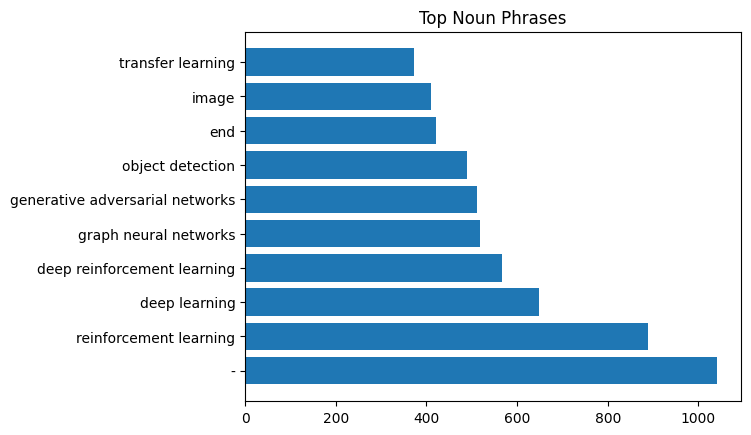

In [14]:
top_np = dict(np_freq.most_common(10))

plt.barh(list(top_np.keys()), list(top_np.values()))
plt.title('Top Noun Phrases')
plt.show()

## Visualization: Entity Frequency

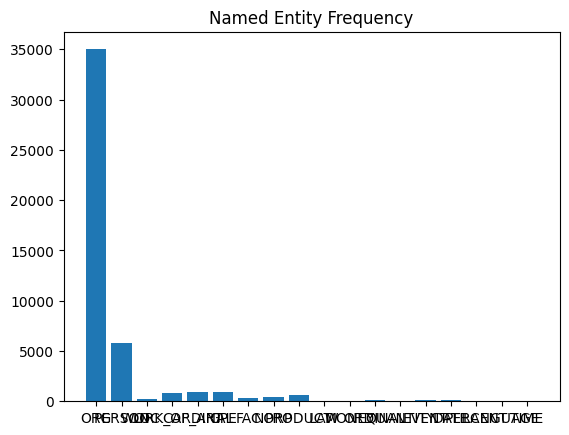

In [15]:
plt.bar(ent_freq.keys(), ent_freq.values())
plt.title('Named Entity Frequency')
plt.show()

## Observations
- spaCy struggles with domain-specific terminology
- General models miss mathematical symbols and formulas
- Rule-based matchers help recover technical patterns